In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
# import emcee

import xmeos
from xmeos import models
from xmeos import datamod

In [2]:
# Load data from Spera et al. 2011
data_og = pd.read_csv('data/MgSiO3-Oganov-mdsim-Spera2011.csv')

In [3]:
# Load Unit conversion info
# Average molar mass of MgSiO3
mass_avg = (24.31+28.09+3*16.0)/5.0 # g/(mol atom)

CONSTS = models.CONSTS
Vconv = CONSTS['ang3percc']*mass_avg/CONSTS['Nmol'] # (ang^3/atom) / (cc/g)
Econv = mass_avg/CONSTS['kJ_molpereV'] # (eV/atom) / (kJ/g)

In [4]:
# Store data
data = datamod.load_data(V=data_og['vol[cc/gm]'], P=data_og['P [GPa]'],
                         T=data_og['T [K]'], E=data_og['Etot [kJ/gm]'],
                         Perr=data_og['P_err [GPa]'],
                         Terr=data_og['T_err [K]'], 
                         Eerr=data_og['Etot_err [kJ/gm]'],
                         Vconv=Vconv, Econv=Econv, mass_avg=mass_avg)

In [14]:
# Set colorbar temperature properties
tbl = data['table']
delT = 500
tbl['Tlbl'] = delT*np.round(tbl['T']/delT)
Tlbl = np.unique(tbl['Tlbl'])
cmap = plt.get_cmap('coolwarm',len(Tlbl))

In [15]:
# View data tables
data['table'].head()

,V,T,P,E,Verr,Terr,Perr,Eerr,Tlbl
0,14.187387,2559,-0.88,-20.740898,0,19,0.19,0.000083,2500.0
1,14.187387,3058,-0.77,-20.571909,0,22,0.21,0.000021,3000.0
2,14.187387,3537,-0.59,-20.411336,0,24,0.21,0.000021,3500.0
3,14.187387,4005,-0.33,-20.258619,0,29,0.24,0.000041,4000.0
4,14.187387,4484,0.01,-20.108494,0,32,0.24,0.000021,4500.0


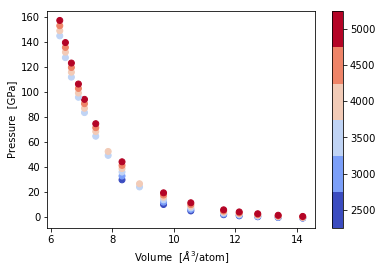

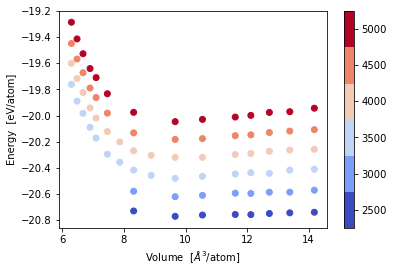

In [16]:

plt.figure()
plt.scatter(tbl['V'],tbl['P'],c=tbl['T'], cmap=cmap)
plt.xlabel(r'Volume  [$\AA^3$/atom]')
plt.ylabel(r'Pressure  [GPa]')
cbar = plt.colorbar()
cbar.set_ticks(Tlbl)
plt.clim(Tlbl[0]-delT/2,Tlbl[-1]+delT/2)


plt.figure()
plt.scatter(tbl['V'],tbl['E'],c=tbl['T'], cmap=cmap)
plt.xlabel(r'Volume  [$\AA^3$/atom]')
plt.ylabel(r'Energy  [eV/atom]')
plt.colorbar()
cbar.set_ticks(Tlbl)
plt.clim(Tlbl[0]-delT/2,Tlbl[-1]+delT/2)